## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


Stakeholder: Real Estate Investment Firm interested in buying houses, improving them, and selling them.
Target: price

# EDA

## Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from scipy import stats as stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
import statsmodels.api as sm

## Functions

In [2]:
def drop_outliers(df, col):
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)
    iqr = q3 - q1

    lower_lim = q1 - 1.5 * iqr
    upper_lim = q3 + 1.5 * iqr

    df = df.loc[ (df[col] >= lower_lim) & (df[col] <= upper_lim) ].reset_index()
    return df

In [3]:
def scale_numberical_cols(df, cols_to_scale):
    df = df.copy()
    features = cols_to_scale
    autoscaler = StandardScaler()
    df[features] = autoscaler.fit_transform(df[features])
    return df


## EDA

In [4]:
df = pd.read_csv('data/kc_house_data.csv')
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long'],
      dtype='object')

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


Finding & Dropping Nulls

In [6]:
df.isnull().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

In [7]:
df = df.dropna().reset_index(drop=True)

In [8]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
view             0
condition        0
grade            0
heat_source      0
sewer_system     0
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
yr_built         0
yr_renovated     0
address          0
lat              0
long             0
dtype: int64

Dropping Undesired Columns

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30111 entries, 0 to 30110
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30111 non-null  int64  
 1   date           30111 non-null  object 
 2   price          30111 non-null  float64
 3   bedrooms       30111 non-null  int64  
 4   bathrooms      30111 non-null  float64
 5   sqft_living    30111 non-null  int64  
 6   sqft_lot       30111 non-null  int64  
 7   floors         30111 non-null  float64
 8   waterfront     30111 non-null  object 
 9   greenbelt      30111 non-null  object 
 10  nuisance       30111 non-null  object 
 11  view           30111 non-null  object 
 12  condition      30111 non-null  object 
 13  grade          30111 non-null  object 
 14  heat_source    30111 non-null  object 
 15  sewer_system   30111 non-null  object 
 16  sqft_above     30111 non-null  int64  
 17  sqft_basement  30111 non-null  int64  
 18  sqft_g

In [10]:
df = df.drop(['view', 
              'sqft_above',
              'sqft_basement', 
              'yr_renovated', 
              'id'
             ], axis=1)

In [11]:
df['date']= pd.to_datetime(df['date'])
df['yr_built']= pd.to_datetime(df['yr_built'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30111 entries, 0 to 30110
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          30111 non-null  datetime64[ns]
 1   price         30111 non-null  float64       
 2   bedrooms      30111 non-null  int64         
 3   bathrooms     30111 non-null  float64       
 4   sqft_living   30111 non-null  int64         
 5   sqft_lot      30111 non-null  int64         
 6   floors        30111 non-null  float64       
 7   waterfront    30111 non-null  object        
 8   greenbelt     30111 non-null  object        
 9   nuisance      30111 non-null  object        
 10  condition     30111 non-null  object        
 11  grade         30111 non-null  object        
 12  heat_source   30111 non-null  object        
 13  sewer_system  30111 non-null  object        
 14  sqft_garage   30111 non-null  int64         
 15  sqft_patio    30111 non-null  int64 

See what zip codes there are

In [12]:
df['zipcode'] = df.address[1][-20:-15]
df['zipcode'].value_counts()

98133    30111
Name: zipcode, dtype: int64

Only one zip code, can't use it. 

In [13]:
df[['date', 'yr_built']] = df[['date', 'yr_built']].apply(pd.to_datetime)
df['age_when_sold'] = ((df['date'] - df['yr_built']).dt.days)/365
df['age_when_sold'].sum()

1563383.994520548

In [14]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,lat,long,age_when_sold
count,3.011100e+04,30111.000000,30111.000000,30111.000000,3.011100e+04,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000
mean,1.108971e+06,3.415197,2.335708,2113.342798,1.664880e+04,1.543506,330.475308,217.451264,47.328482,-121.318872,51.920693
std,8.965158e+05,0.979755,0.888293,973.453260,5.993303e+04,0.567789,285.725020,245.301991,1.433309,5.724073,0.298095
min,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,0.000000,0.000000,21.274240,-157.791480,51.471233
25%,6.492360e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,0.000000,40.000000,47.405348,-122.326075,51.660274
50%,8.600000e+05,3.000000,2.500000,1920.000000,7.477000e+03,1.500000,400.000000,150.000000,47.551440,-122.225790,51.871233
75%,1.300000e+06,4.000000,3.000000,2620.000000,1.056800e+04,2.000000,510.000000,320.000000,47.669917,-122.116394,52.210959
max,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,3580.000000,4370.000000,64.824070,-70.074340,52.468493


Find the most correlated column to price

In [15]:
df.corr()['price'].sort_values()

long            -0.022278
lat              0.063430
age_when_sold    0.071493
sqft_lot         0.086550
floors           0.180589
sqft_garage      0.263674
bedrooms         0.288954
sqft_patio       0.313789
bathrooms        0.480337
sqft_living      0.608616
price            1.000000
Name: price, dtype: float64

### EDA Visualizations

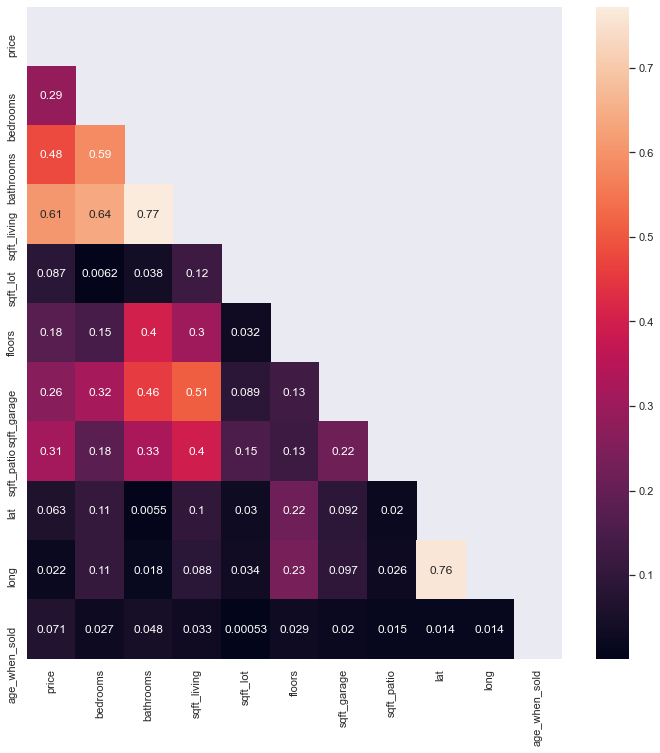

In [16]:
sns.set(rc={'figure.figsize':(12, 12)})

# Use the .heatmap function to depict the relationships visually!
mask  = np.triu(np.ones_like(df.corr()))
sns.heatmap(abs(df.corr()), annot=True, mask=mask);

In [17]:
#pairplot with continuous variables
#commented out for run-time

#sns.pairplot(df[['price', 'sqft_living', 'sqft_lot', 'sqft_patio']])

In [18]:
#pairplot with wanted columns
#commented out for run-time

#sns.pairplot(df_colwanted)

Log Scale Target

<AxesSubplot:xlabel='price', ylabel='Count'>

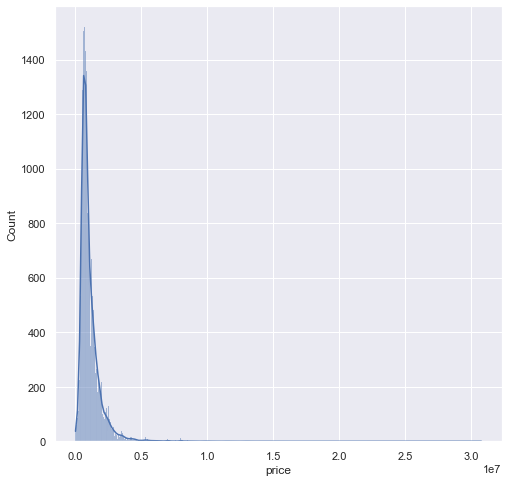

In [19]:
fig, ax = plt.subplots(figsize=(8,8))
sns.histplot(df.price, kde=True)

<AxesSubplot:xlabel='price', ylabel='Count'>

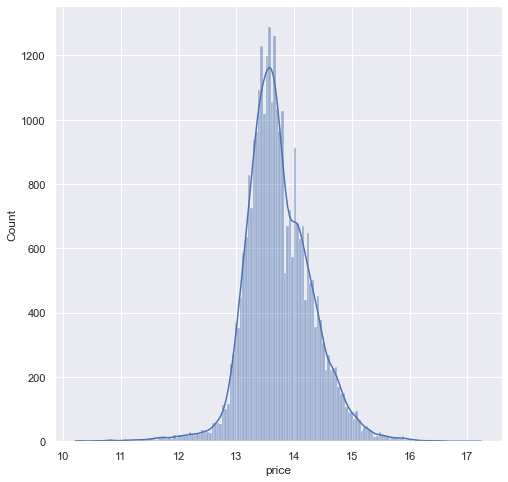

In [20]:
#logscaling target
fig, ax = plt.subplots(figsize=(8,8))
y2 = np.log(df.price)
sns.histplot(y2, kde=True)

### EDA - Baseline OLS Model

In [21]:
x = sm.add_constant(df[['sqft_living', 'sqft_lot', 'sqft_patio']])
y = df['price']
model = sm.OLS(y, x).fit()
model.rsquared

0.3766514441665971

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     6064.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        11:09:51   Log-Likelihood:            -4.4832e+05
No. Observations:               30111   AIC:                         8.966e+05
Df Residuals:                   30107   BIC:                         8.967e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.759e+04   9751.208     -7.956      0.000   -9.67e+04   -5.85e+04
sqft_living   528.9107      4.575    115.605      0.000     519.943     537.878
sqft_lot        0.0464      0.069      0.672      0.502      -0.089       0.182
sqft_patio    312.7786     18.239     17.149      0.000     277.029     348.528
==============================================================================
Omnibus:                    43140.750   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         45972551.037
Skew:                           8.106   Prob(JB):                         0.00
Kurtosis:                     193.734   Cond. No.                     1.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### EDA - Log Scaled OLS Model

In [23]:
x = sm.add_constant(df[['sqft_living', 'sqft_lot', 'sqft_patio']])
y2 = np.log(df['price'])
model = sm.OLS(y2, x).fit()
model.rsquared

0.3916904360853065

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     6462.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        11:09:51   Log-Likelihood:                -18944.
No. Observations:               30111   AIC:                         3.790e+04
Df Residuals:                   30107   BIC:                         3.793e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.9485      0.006   2070.495      0.000      12.936      12.961
sqft_living     0.0004   2.93e-06    120.629      0.000       0.000       0.000
sqft_lot     6.312e-09   4.43e-08      0.143      0.887   -8.05e-08    9.31e-08
sqft_patio      0.0002   1.17e-05     15.311      0.000       0.000       0.000
==============================================================================
Omnibus:                     5961.142   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            50165.584
Skew:                          -0.718   Prob(JB):                         0.00
Kurtosis:                       9.158   Cond. No.                     1.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### EDA - Log Scaled OLS

(dropping columns to address multicolinearity)

In [25]:
x = sm.add_constant(df[['sqft_living', 'age_when_sold', 'long', 'lat']])
y2 = np.log(df['price'])
model = sm.OLS(y2, x).fit()
model.rsquared

0.4033752769726606

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     5089.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        11:09:52   Log-Likelihood:                -18652.
No. Observations:               30111   AIC:                         3.731e+04
Df Residuals:                   30106   BIC:                         3.736e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.5415      0.459      3.360      0.001       0.642       2.441
sqft_living       0.0004   2.68e-06    139.744      0.000       0.000       0.000
age_when_sold     0.2120      0.009     24.369      0.000       0.195       0.229
long              0.0107      0.001     15.410      0.000       0.009       0.012
lat               0.0359      0.003     12.893      0.000       0.030       0.041
==============================================================================
Omnibus:                     6292.938   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            56099.510
Skew:                          -0.754   Prob(JB):                         0.00
Kurtosis:                       9.514   Cond. No.                     4.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### EDA - OneHotEncoding

In [27]:
#0:number of baths
#1:number of bedrooms
#2:condition
#3:heat source

ohe = OneHotEncoder(drop='first')
ohe_cols = ['bathrooms', 'bedrooms', 'condition', 'heat_source']
ohe.fit(df[ohe_cols])
ohe_all = pd.DataFrame(ohe.transform(df[ohe_cols]).todense(),
                        columns=ohe.get_feature_names())
ohe_all
X_cat = pd.concat([x,ohe_all], axis=1)
X_cat.head(2)

,const,sqft_living,age_when_sold,long,lat,x0_0.5,x0_1.0,x0_1.5,x0_2.0,x0_2.5,...,x2_Fair,x2_Good,x2_Poor,x2_Very Good,x3_Electricity/Solar,x3_Gas,x3_Gas/Solar,x3_Oil,x3_Oil/Solar,x3_Other
0,1.0,1180,52.424658,-122.19052,47.461975,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,2770,51.980822,-122.35591,47.711525,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [28]:
scaled_oheall_model = sm.OLS(y2, sm.add_constant(X_cat)).fit()
scaled_oheall_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     481.9
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        11:09:53   Log-Likelihood:                -18112.
No. Observations:               30111   AIC:                         3.632e+04
Df Residuals:                   30064   BIC:                         3.671e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.0060      0.461      2.182      0.029       0.102       1.910
sqft_living              0.0004   4.72e-06     76.036      0.000       0.000       0.000
age_when_sold            0.2198      0.009     25.661      0.000       0.203       0.237
long                     0.0103      0.001     14.930      0.000       0.009       0.012
lat                      0.0375      0.003     13.641      0.000       0.032       0.043
x0_0.5                   0.7661      0.231      3.315      0.001       0.313       1.219
x0_1.0                   0.5625      0.120      4.703      0.000       0.328       0.797
x0_1.5                   0.5945      0.120      4.953      0.000       0.359       0.830
x0_2.0                   0.6725      0.120      5.617      0.000       0.438       0.907
x0_2.5                   0.6769      0.120      5.655      0.000       0.442       0.911
x0_3.0                   0.7228      0.120      6.031      0.000       0.488       0.958
x0_3.5                   0.8350      0.120      6.957      0.000       0.600       1.070
x0_4.0                   0.8371      0.121      6.921      0.000       0.600       1.074
x0_4.5                   0.9090      0.122      7.481      0.000       0.671       1.147
x0_5.0                   0.8657      0.126      6.887      0.000       0.619       1.112
x0_5.5                   0.7933      0.128      6.190      0.000       0.542       1.045
x0_6.0                   0.8956      0.138      6.506      0.000       0.626       1.165
x0_6.5                   0.9791      0.150      6.526      0.000       0.685       1.273
x0_7.0                   0.7399      0.178      4.160      0.000       0.391       1.088
x0_7.5                   0.5288      0.179      2.957      0.003       0.178       0.879
x0_8.0                   0.3110      0.336      0.925      0.355      -0.348       0.970
x0_8.5                   1.4464      0.464      3.115      0.002       0.536       2.356
x0_9.5                   0.9114      0.458      1.989      0.047       0.013       1.809
x0_10.0                 -1.7841      0.463     -3.850      0.000      -2.692      -0.876
x0_10.5                 -0.9855      0.460     -2.143      0.032      -1.887      -0.084
x1_1                    -0.4618      0.098     -4.708      0.000      -0.654      -0.270
x1_2                    -0.6023      0.096     -6.275      0.000      -0.790      -0.414
x1_3                    -0.6944      0.096     -7.236      0.000      -0.882      -0.506
x1_4                    -0.7426      0.096     -7.723      0.000      -0.931      -0.554
x1_5                    -0.8062      0.097     -8.349      0.000      -0.995      -0.617
x1_6                    -0.8722      0.098     -8.871      0.000      -1.065      -0.680
x1_7                    -0.9571      0.109     -8.813    

### Scale the numberical columns

In [29]:
df = scale_numberical_cols(df, ['sqft_living', "sqft_lot", "sqft_garage",
                                'sqft_patio'])
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,lat,long,age_when_sold
count,3.011100e+04,30111.000000,30111.000000,3.011100e+04,3.011100e+04,30111.000000,3.011100e+04,3.011100e+04,30111.000000,30111.000000,30111.000000
mean,1.108971e+06,3.415197,2.335708,-1.547993e-16,-8.967030e-18,1.543506,-4.766684e-17,1.392249e-17,47.328482,-121.318872,51.920693
std,8.965158e+05,0.979755,0.888293,1.000017e+00,1.000017e+00,0.567789,1.000017e+00,1.000017e+00,1.433309,5.724073,0.298095
min,2.736000e+04,0.000000,0.000000,-2.167929e+00,-2.710871e-01,1.000000,-1.156639e+00,-8.864782e-01,21.274240,-157.791480,51.471233
25%,6.492360e+05,3.000000,2.000000,-7.122626e-01,-1.968697e-01,1.000000,-1.156639e+00,-7.234112e-01,47.405348,-122.326075,51.660274
50%,8.600000e+05,3.000000,2.500000,-1.986187e-01,-1.530367e-01,1.500000,2.433313e-01,-2.749769e-01,47.551440,-122.225790,51.871233
75%,1.300000e+06,4.000000,3.000000,5.204827e-01,-1.014616e-01,2.000000,6.283233e-01,4.180579e-01,47.669917,-122.116394,52.210959
max,3.075000e+07,13.000000,10.500000,1.360813e+01,5.401591e+01,4.000000,1.137310e+01,1.692859e+01,64.824070,-70.074340,52.468493


In [30]:
ohe_cols = ['bathrooms', 'bedrooms', 'condition', 'heat_source']
ohe = OneHotEncoder(drop='first')
    
ohe.fit(df[ohe_cols])
ohe_all = pd.DataFrame(ohe.transform(df[ohe_cols]).todense(),
                            columns=ohe.get_feature_names())

X_cat = pd.concat([x,ohe_all], axis=1)
scaled_oheall_model = sm.OLS(y2, sm.add_constant(X_cat)).fit()
scaled_oheall_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     481.9
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        11:09:54   Log-Likelihood:                -18112.
No. Observations:               30111   AIC:                         3.632e+04
Df Residuals:                   30064   BIC:                         3.671e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.0060      0.461      2.182      0.029       0.102       1.910
sqft_living              0.0004   4.72e-06     76.036      0.000       0.000       0.000
age_when_sold            0.2198      0.009     25.661      0.000       0.203       0.237
long                     0.0103      0.001     14.930      0.000       0.009       0.012
lat                      0.0375      0.003     13.641      0.000       0.032       0.043
x0_0.5                   0.7661      0.231      3.315      0.001       0.313       1.219
x0_1.0                   0.5625      0.120      4.703      0.000       0.328       0.797
x0_1.5                   0.5945      0.120      4.953      0.000       0.359       0.830
x0_2.0                   0.6725      0.120      5.617      0.000       0.438       0.907
x0_2.5                   0.6769      0.120      5.655      0.000       0.442       0.911
x0_3.0                   0.7228      0.120      6.031      0.000       0.488       0.958
x0_3.5                   0.8350      0.120      6.957      0.000       0.600       1.070
x0_4.0                   0.8371      0.121      6.921      0.000       0.600       1.074
x0_4.5                   0.9090      0.122      7.481      0.000       0.671       1.147
x0_5.0                   0.8657      0.126      6.887      0.000       0.619       1.112
x0_5.5                   0.7933      0.128      6.190      0.000       0.542       1.045
x0_6.0                   0.8956      0.138      6.506      0.000       0.626       1.165
x0_6.5                   0.9791      0.150      6.526      0.000       0.685       1.273
x0_7.0                   0.7399      0.178      4.160      0.000       0.391       1.088
x0_7.5                   0.5288      0.179      2.957      0.003       0.178       0.879
x0_8.0                   0.3110      0.336      0.925      0.355      -0.348       0.970
x0_8.5                   1.4464      0.464      3.115      0.002       0.536       2.356
x0_9.5                   0.9114      0.458      1.989      0.047       0.013       1.809
x0_10.0                 -1.7841      0.463     -3.850      0.000      -2.692      -0.876
x0_10.5                 -0.9855      0.460     -2.143      0.032      -1.887      -0.084
x1_1                    -0.4618      0.098     -4.708      0.000      -0.654      -0.270
x1_2                    -0.6023      0.096     -6.275      0.000      -0.790      -0.414
x1_3                    -0.6944      0.096     -7.236      0.000      -0.882      -0.506
x1_4                    -0.7426      0.096     -7.723      0.000      -0.931      -0.554
x1_5                    -0.8062      0.097     -8.349      0.000      -0.995      -0.617
x1_6                    -0.8722      0.098     -8.871      0.000      -1.065      -0.680
x1_7                    -0.9571      0.109     -8.813    

Scaling didn't change r squared (as expected)

### Testing adding additional categorical features with OHE

In [31]:
ohe_cols = ['bathrooms', 'bedrooms', 'condition', 'heat_source', 'waterfront', 'grade',
            'floors', 'yr_built']
ohe = OneHotEncoder(drop='first')
    
ohe.fit(df[ohe_cols])
ohe_all = pd.DataFrame(ohe.transform(df[ohe_cols]).todense(),
                            columns=ohe.get_feature_names())

X_cat = pd.concat([x,ohe_all], axis=1)
scaled_oheall_model = sm.OLS(y2, sm.add_constant(X_cat)).fit()
scaled_oheall_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     176.5
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        11:09:59   Log-Likelihood:                -15277.
No. Observations:               30111   AIC:                         3.093e+04
Df Residuals:                   29924   BIC:                         3.248e+04
Df Model:                         186                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                1.5566      0.428      3.635      0.000       0.717       2.396
sqft_living                          0.0002   5.28e-06     33.877      0.000       0.000       0.000
age_when_sold                        0.2289      0.008     29.072      0.000       0.214       0.244
long                                 0.0074      0.001     11.600      0.000       0.006       0.009
lat                                  0.0334      0.003     13.197      0.000       0.028       0.038
x0_0.5                               0.7037      0.213      3.306      0.001       0.286       1.121
x0_1.0                               0.4732      0.111      4.280      0.000       0.257       0.690
x0_1.5                               0.5004      0.111      4.517      0.000       0.283       0.718
x0_2.0                               0.5648      0.110      5.112      0.000       0.348       0.781
x0_2.5                               0.5970      0.110      5.405      0.000       0.381       0.814
x0_3.0                               0.6366      0.111      5.757      0.000       0.420       0.853
x0_3.5                               0.6935      0.111      6.261      0.000       0.476       0.911
x0_4.0                               0.6999      0.112      6.272      0.000       0.481       0.919
x0_4.5                               0.7768      0.112      6.926      0.000       0.557       0.997
x0_5.0                               0.7723      0.116      6.659      0.000       0.545       1.000
x0_5.5                               0.7589      0.118      6.414      0.000       0.527       0.991
x0_6.0                               0.8565      0.127      6.744      0.000       0.608       1.105
x0_6.5                               0.9246      0.139      6.667      0.000       0.653       1.196
x0_7.0                               0.9540      0.164      5.812      0.000       0.632       1.276
x0_7.5                               0.8405      0.166      5.073      0.000       0.516       1.165
x0_8.0                               0.8498      0.320      2.656      0.008       0.223       1.477
x0_8.5                               1.0436      0.426      2.447      0.014       0.208       1.879
x0_9.5                               0.2563      0.420      0.611      0.541      -0.566       1.079
x0_10.0                             -0.6818      0.426     -1.602      0.109      -1.516       0.152
x0_10.5                             -0.2230      0.423     -0.527      0.598      -1.052       0.606
x1_1                                -0.4921      0.090     -5.474      0.000      -0.668      -0.316
x1_2                                -0.6626      0.088     -7.540      0.000      -0.835      -0.490
x1_3                                -0.6809      0.08

***This is the best r squared that we have observed***

### Binning

In [32]:
df['heat_source'].value_counts()

Gas                  20576
Electricity           6460
Oil                   2899
Gas/Solar               93
Electricity/Solar       59
Other                   20
Oil/Solar                4
Name: heat_source, dtype: int64

In [33]:
df['heat_source_binned'] = df['heat_source']
df.loc[ df['heat_source_binned'] == 'Gas', 'heat_source_binned'] = 'Gas'
df.loc[ df['heat_source_binned'] == 'Electricity', 'heat_source_binned'] = 'Electricity'
df.loc[ df['heat_source_binned'] == 'Oil', 'heat_source_binned'] = 'Oil'
df.loc[ df['heat_source_binned'] == 'Electricity/Solar', 'heat_source_binned'] = 'Other'
df.loc[ df['heat_source_binned'] == 'Other', 'heat_source_binned'] = 'Other'
df.loc[ df['heat_source_binned'] == 'Oil/Solar', 'heat_source_binned'] = 'Other'
df.loc[ df['heat_source_binned'] == 'Gas/Solar', 'heat_source_binned'] = 'Other'

df['heat_source_binned'].value_counts()

Gas            20576
Electricity     6460
Oil             2899
Other            176
Name: heat_source_binned, dtype: int64

In [34]:
df['grade'].value_counts()

7 Average        11693
8 Good            9400
9 Better          3804
6 Low Average     2852
10 Very Good      1369
11 Excellent       406
5 Fair             385
12 Luxury          122
4 Low               46
13 Mansion          24
3 Poor               9
2 Substandard        1
Name: grade, dtype: int64

In [35]:
df['grade_binned'] = df['grade']
df.loc[ df['grade_binned'] == '2 Substandard', 'grade_binned'] = 'Low'
df.loc[ df['grade_binned'] == '3 Poor', 'grade_binned'] = 'Low'
df.loc[ df['grade_binned'] == '4 Low', 'grade_binned'] = 'Low'
df.loc[ df['grade_binned'] == '5 Fair', 'grade_binned'] = 'Low'
df.loc[ df['grade_binned'] == '6 Low Average', 'grade_binned'] = 'Average'
df.loc[ df['grade_binned'] == '7 Average', 'grade_binned'] = 'Average'
df.loc[ df['grade_binned'] == '8 Good', 'grade_binned'] = 'Average'
df.loc[ df['grade_binned'] == '9 Better', 'grade_binned'] = 'Average'
df.loc[ df['grade_binned'] == '10 Very Good', 'grade_binned'] = 'High'
df.loc[ df['grade_binned'] == '11 Excellent', 'grade_binned'] = 'High'
df.loc[ df['grade_binned'] == '12 Luxury', 'grade_binned'] = 'High'
df.loc[ df['grade_binned'] == '13 Mansion', 'grade_binned'] = 'High'

df['grade_binned'].value_counts()

Average    27749
High        1921
Low          441
Name: grade_binned, dtype: int64

In [36]:
ohe_cols = ['bathrooms', 'bedrooms', 'condition', 'heat_source_binned',  
            'waterfront', 'grade_binned','floors', 'yr_built']
    
ohe.fit(df[ohe_cols])
ohe_all = pd.DataFrame(ohe.transform(df[ohe_cols]).todense(),
                            columns=ohe.get_feature_names())

X_cat = pd.concat([x,ohe_all], axis=1)
scaled_oheall_model = sm.OLS(y2, sm.add_constant(X_cat)).fit()
scaled_oheall_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     151.6
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        11:10:03   Log-Likelihood:                -16915.
No. Observations:               30111   AIC:                         3.418e+04
Df Residuals:                   29936   BIC:                         3.563e+04
Df Model:                         174                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.7552      0.451      1.673      0.094      -0.130       1.640
sqft_living                          0.0003   5.03e-06     58.292      0.000       0.000       0.000
age_when_sold                        0.2264      0.008     27.241      0.000       0.210       0.243
long                                 0.0094      0.001     14.004      0.000       0.008       0.011
lat                                  0.0359      0.003     13.453      0.000       0.031       0.041
x0_0.5                               0.8029      0.224      3.581      0.000       0.363       1.242
x0_1.0                               0.5714      0.116      4.921      0.000       0.344       0.799
x0_1.5                               0.6405      0.116      5.501      0.000       0.412       0.869
x0_2.0                               0.7200      0.116      6.201      0.000       0.492       0.948
x0_2.5                               0.7849      0.116      6.762      0.000       0.557       1.012
x0_3.0                               0.8254      0.116      7.103      0.000       0.598       1.053
x0_3.5                               0.9031      0.116      7.759      0.000       0.675       1.131
x0_4.0                               0.8864      0.117      7.557      0.000       0.656       1.116
x0_4.5                               0.9201      0.118      7.805      0.000       0.689       1.151
x0_5.0                               0.8986      0.122      7.375      0.000       0.660       1.137
x0_5.5                               0.7869      0.124      6.327      0.000       0.543       1.031
x0_6.0                               0.9088      0.133      6.820      0.000       0.648       1.170
x0_6.5                               0.9559      0.145      6.575      0.000       0.671       1.241
x0_7.0                               0.8452      0.172      4.913      0.000       0.508       1.182
x0_7.5                               0.6744      0.173      3.902      0.000       0.336       1.013
x0_8.0                               0.3841      0.325      1.183      0.237      -0.252       1.020
x0_8.5                               1.1505      0.448      2.566      0.010       0.272       2.029
x0_9.5                               0.3986      0.443      0.901      0.368      -0.469       1.266
x0_10.0                             -1.4014      0.448     -3.132      0.002      -2.279      -0.524
x0_10.5                             -0.6157      0.445     -1.384      0.166      -1.487       0.256
x1_1                                -0.4898      0.095     -5.167      0.000      -0.676      -0.304
x1_2                                -0.6513      0.093     -7.021      0.000      -0.833      -0.469
x1_3                                -0.7004      0.09

Binning made it worse

### Drop outliers
Dropping the price outliers 

In [37]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,lat,long,age_when_sold
count,3.011100e+04,30111.000000,30111.000000,3.011100e+04,3.011100e+04,30111.000000,3.011100e+04,3.011100e+04,30111.000000,30111.000000,30111.000000
mean,1.108971e+06,3.415197,2.335708,-1.547993e-16,-8.967030e-18,1.543506,-4.766684e-17,1.392249e-17,47.328482,-121.318872,51.920693
std,8.965158e+05,0.979755,0.888293,1.000017e+00,1.000017e+00,0.567789,1.000017e+00,1.000017e+00,1.433309,5.724073,0.298095
min,2.736000e+04,0.000000,0.000000,-2.167929e+00,-2.710871e-01,1.000000,-1.156639e+00,-8.864782e-01,21.274240,-157.791480,51.471233
25%,6.492360e+05,3.000000,2.000000,-7.122626e-01,-1.968697e-01,1.000000,-1.156639e+00,-7.234112e-01,47.405348,-122.326075,51.660274
50%,8.600000e+05,3.000000,2.500000,-1.986187e-01,-1.530367e-01,1.500000,2.433313e-01,-2.749769e-01,47.551440,-122.225790,51.871233
75%,1.300000e+06,4.000000,3.000000,5.204827e-01,-1.014616e-01,2.000000,6.283233e-01,4.180579e-01,47.669917,-122.116394,52.210959
max,3.075000e+07,13.000000,10.500000,1.360813e+01,5.401591e+01,4.000000,1.137310e+01,1.692859e+01,64.824070,-70.074340,52.468493


In [38]:
df = drop_outliers(df, 'price').reset_index()
df['price'].describe()

count    2.812000e+04
mean     9.419833e+05
std      4.347023e+05
min      2.736000e+04
25%      6.300000e+05
50%      8.299925e+05
75%      1.199950e+06
max      2.275182e+06
Name: price, dtype: float64

In [42]:
X_cat.isna().sum()

const               0
sqft_living         0
age_when_sold       0
long                0
lat                 0
x0_0.5           1991
x0_1.0           1991
x0_1.5           1991
x0_2.0           1991
x0_2.5           1991
x0_3.0           1991
x0_3.5           1991
x0_4.0           1991
x0_4.5           1991
x0_5.0           1991
x0_5.5           1991
x0_6.0           1991
x0_6.5           1991
x0_7.0           1991
x0_7.5           1991
x1_1             1991
x1_2             1991
x1_3             1991
x1_4             1991
x1_5             1991
x1_6             1991
x1_7             1991
x1_8             1991
x1_9             1991
x1_10            1991
x1_11            1991
x2_Fair          1991
x2_Good          1991
x2_Poor          1991
x2_Very Good     1991
x3_Gas           1991
x3_Oil           1991
x3_Other         1991
x4_YES           1991
x5_High          1991
x5_Low           1991
x6_1.5           1991
x6_2.0           1991
x6_2.5           1991
x6_3.0           1991
x6_3.5    

In [41]:
ohe_cols = ['bathrooms', 'bedrooms', 'condition', 'heat_source_binned',  
            'waterfront', 'grade_binned','floors']
ohe.fit(df[ohe_cols])
ohe_all = pd.DataFrame(ohe.transform(df[ohe_cols]).todense(),
                            columns=ohe.get_feature_names())

X_cat = pd.concat([x,ohe_all], axis=1)
scaled_oheall_model = sm.OLS(y2, sm.add_constant(X_cat)).fit()
scaled_oheall_model.summary()

MissingDataError: exog contains inf or nans